<h1><font color="#113D68" size=5>Redes neuronales y deep learning</font></h1>



<h1><font color="#113D68" size=6>Caso Práctico: análisis de un problema de regresión con Deep Learning</font></h1>


<br><br>
<div style="text-align: right">
<font size=3>Brianny Hernandez</font><br>
<font size=3>Semana 3: Ajuste de modelos de Deep Learning</font><br>
<font size=3>IEBS</font>
</div>

---


<a id="indice"></a>
<h2><font color="#004D7F" size=5>Índice</font></h2>

* [Caso práctico](#section1)
    - [Parte obligatoria](#section1.1)
    - [Parte opcional](#section1.2)
    - [Objetivos](#section1.3)
    - [Criterios de entrega](#section1.4)
    - [Temporalización](#section1.5)
* [California Housing Dataset](#section2)
* [Establecer una función de coste adecuada a nuestro problema](#section3)
* [Overfitting sobre un pequeño conjunto de datos](#section4)
    - [Ejercicio 1](section4.1)
    - [Ejercicio 2](section4.2)
    - [Ejercicio 3](section4.3)
    - [Ejercicio 4](section4.4)
    - [Ejercicio 5](section4.5)
* [Elegimos un Optimizer](#section5)
    - [Ejercicio 6](section5.1)
    - [Ejercicio 7](section5.2)
    - [Ejercicio 8](section5.3)
* [Probar diferentes configuraciones con un número pequeño de epochs](#section6)
    - [Ejercicio 9](section6.1)
    - [Ejercicio 10](section6.2)
* [Ajuste refinado de los parámetros con más epochs](#section7)
    - [Ejercicio 11](section7.1)
    - [Ejercicio 12](section7.2)

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

# Para mostrar gráficas
import matplotlib.pyplot as plt
%matplotlib inline

# Anaconda fixing problem
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

# <font color="#004D7F" size=5>Caso práctico</font>

El objetivo de este caso práctico es simular como se haría un análisis completo de un problema para resolverlo con Deep Learning. Nos pondremos en la piel de un *data scientist* dedicado a analizar y crear modelos de Deep Learning para pasarlos a producción y ser desplegados en una aplicación.

**Destacar que este caso práctico es la continuación de la última actividad realizada en la semana anterior. En la actividad de la semana anterior encontramos la mejor arquitectura para los datos que tenemos y ahora vmoas a realizar más experimentos jugando con los optimizers y el valor del learning rate.**

Imaginemos que tenemos un dataset completo que queremos explotar, nuestra labor será coger este dataset (California Housing Dataset) y desde 0 intentar llegar conseguir un modelo que tenga un buen rendimiento ajustándolo poco a poco como hemos visto en clase. Por lo que tendrmeos que entrerar distintas redes y comparar los resultados que obtengamos en cada experimento para ver cual es mejor.

Cada experimento que tendremos que realizar estará bien definido, la red que deberéis crear y entrenar será proporcinada por lo que solamente tendréis que crear la red que se nos indica con TensorFlow y realizar el entrenamiento de la misma.

## <font color="#004D7F" size=4>Parte obligatoria</font>

Será obligatorio realizar cada uno de los ejercicios que están definidos. En cada ejercicio está definida la red que se tiene que crear y la configuración con la que se tiene que entrenar, por lo que solamente tendréis que pasar esa definición a código con TensorFlow.

Para tener una buena práctica en la realización de este caso práctico se ofrecen esta recomendaciones:

- Utiliza correctamente el sistema de celdas de jupyter. La libreta está realizada de tal forma que solo tendréis que completar las celdas que se indican, ya sea con código o con texto en markdown. Se recomienda rellenar solamente las celdas indicadas para que quede un informe limpio y fácil de seguir. Si fuera necesario incluir más celdas por cualquier motivo se puede hacer pero realizarlo con cuidado para no ensuciar demasiado la libreta.
<br><br>
- Las redes que tendréis que crear en cada experimento son las vistas en clase, por lo que os podéis inspirar en los ejemplos vistos en los tutoriales. Os recomiendo que no copiéis y peguéis código tal cual, sino que lo escribáis por vuestra cuenta y entendáis lo que estáis haciendo en cada momento. Tomaros el tiempo que haga falta para entender cada paso.
<br><br>
- Comprueba que todo se ejecuta correctamente antes de enviar tu trabajo. La mejor forma de enviarlo es exportando la libreta a pdf o html para enviarla en un formato más profesional.

## <font color="#004D7F" size=4>Parte opcional</font>
La parte opcional son los últimos ejercicios donde tendréis que sacar una conclusión de si la red que habéis llegado a conseguir tiene un buen rendimiento.

## <font color="#004D7F" size=4>Objetivos</font>
* Cargar y entender los datos del dataset California Housing con los que se trabajarán.
* Crear cada una de las redes indicadas en los experimentos.
* Entrenar cada una de las redes creadas en los experimentos.
* Entender los resultados obtenidos en cada entrenamiento.

## <font color="#004D7F" size=4>Criterios de entrega</font>
Se deberá entregar una libreta de jupyter, aunque se agradecerá que el formato entregado se html o pdf, el trabajo debe estar autocontenido, incluyendo código y texto explicativo para cada sección.

# <font color="#004D7F" size=5>California Housing Dataset</font>
En este notebook vamos a usar un dataset nuevo, el dataset es muy parecido al dataset del precio de las casas de boston. Esta vez vamos a utilizar un conjunto de datos que contienen información sobre el precio de las casas encontradas en un distrito de California. Las columnas son las siguientes:

- _longitude_: cuanto de al oeste está una casa; un valor más alto está más al oeste.
- _latitude_: cuanto de al norte está una casa; un valor más alto está más al norte.
- _housing_median_age_: edad media de una casa; un valor bajo es una casa más nueva.
- _total_rooms_: número total de habitaciones.
- _total_bedrooms_: número total de dormitorios.
- _population_: número total de personas que residen.
- _households_: número total de hogares, un grupo de personas que residen dentro de una unidad de vivienda.
- _median_income_: ingreso medio de los hogares dentro de un bloque de casas (medido en decenas de miles de dólares).
- _ocean_proximity_: ubicación de la casa cerca del océano o mar.
- _median_house_value (**variables a predecir**)_: valor medio de la vivienda (medido en dólares).

Vamos a cargar los datos desde el fichero `housing.csv`:

In [49]:
df = pd.read_csv('housing.csv')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,3,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,3,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,3,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,3,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,3,342200.0


In [4]:
df.shape

(20433, 10)

Vamos a separar la variable objetivo del resto de variables (accedemos al campo value para que los datos sean de tipo _numpy array_ y se puedan usar como variable de entrada de nuestra red):

In [5]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

In [50]:
x = df[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity']].values
y = df[['median_house_value']].values

In [7]:
#tipo de los datos del df
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
ocean_proximity         int64
median_house_value    float64
dtype: object

In [9]:
#Buscando los valores nulos
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [10]:
#Usando la funcion describe
estadisticas_descriptivas = df.describe()
print(estadisticas_descriptivas)

          longitude      latitude  housing_median_age   total_rooms  \
count  20433.000000  20433.000000        20433.000000  20433.000000   
mean    -119.570689     35.633221           28.633094   2636.504233   
std        2.003578      2.136348           12.591805   2185.269567   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1450.000000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.720000           37.000000   3143.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20433.000000  20433.000000   20433.000000   
mean       537.870553   1424.946949    499.433465       3.871162   
std        421.385070   1133.208490    382.299226       1.899291   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

###Conclusiones

La mayoria de los datos en el dataset son float y entero, por lo que nos encontramos antes una problematica de regresion, estos no contienen valores nulos en ninguno de los campos. Los valores de las estadisticas descriptivas nos dan un panorama general al proveer ciertas medidas que nos ayudan con uno de los análisis más simples del dataframe al poder identificar: la cantidad de registros, la media, desviación estándar, el valor mínimo y máximo y los percentiles de cada una de las columnas.

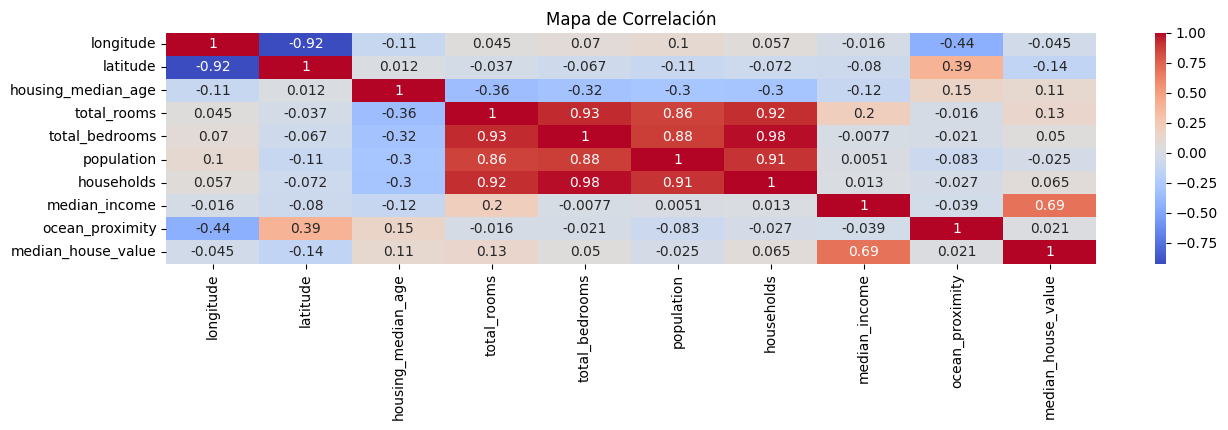

In [12]:
# Mapa de Correlación
import seaborn as sns
plt.figure(figsize=(15, 3))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de Correlación')
plt.show()

###Conclusion del mapa de correlacion

La variable que mas correlacion tiene con nuestra variable objetivo (median_house_value) es la median_income.

In [51]:
#separar los datos en conjuntos de entrenamiento y prueba.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [15]:
#Explorar el conjunto de datos
print("Num training: ", x_train.shape[0])
print("Num test: ", x_test.shape[0])
print("Dimension input: ", x_train.shape)
print("Dimension output: ", y_train.shape)
print("Output example: ", y_train[0])

Num training:  16346
Num test:  4087
Dimension input:  (16346, 9)
Dimension output:  (16346, 1)
Output example:  [255400.]


## 1. Establecer una función de coste adecuada a nuestro problema.

En este caso, como es un problema de regresión y los valores de nuestros datos son tan grandes, elegimos la función de coste `mean_absolute_percentage_error`, este error varía entre los valores 100 y 0 donde 100 es el pero error que podemos llegar a tener y 0 es el mejor error, por lo que en nuestros entrenamientos buscaremos un error más cercano a 0.

In [13]:
actual_loss = 'mean_absolute_percentage_error'

## 2. Overfitting sobre un pequeño conjunto de datos.

Ahora, como ya hemos visto en clase vamos a encontrar una estructura de red que encaje con los datos que vamos a utilizar. Vamos a crear varias redes a ver que talfuncionan.

Para hacer entrenamientos rápidos y ver si la red se adapta a los datos vamos a usar solo un subconjunto de los datos, es decir usaremos 1000 datos y no usaremos conjunto de validación.

### <font color="#004D7F" size=4>Ejercicio 1</font>

Crear una red con la siguiente configuración y entrénala:

- **Configuración de la red**:
    - Arquitectura de la red:
        - *1º Capa*: capa de entrada donde indiques la dimensión de los datos.
        - *2º Capa*: capa densa con 8 neuronas y función de activación *relu*.
        - *3º Capa*: capa densa con 8 neuronas y función de activación *relu*.
        - *4º Capa*: capa de salida con una neurona sin función de activación.
        
    - Tipo de entrenamiento:
        - *Epochs*: 30
        - *Optimizador*: *adam*
        - *Learning Rate*: 0.001

In [21]:
# Arquitectura de la red
model1 = tf.keras.models.Sequential([
  # Capa de entrada
  tf.keras.layers.Input(shape=(9,)),

  # Capa oculta
  tf.keras.layers.Dense(8, activation='relu'),
  tf.keras.layers.Dense(8, activation='relu'),

  # Capa de salida
  tf.keras.layers.Dense(1)
])

model1.summary()

#Optimizador: adam,  Learning Rate: 0.001

opt = tf.keras.optimizers.Adam(
    learning_rate=0.001
)

#Compilar el modelo
model1.compile(optimizer=opt,
              loss= actual_loss,
              metrics=['mean_squared_error'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 8)                 80        
                                                                 
 dense_4 (Dense)             (None, 8)                 72        
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 161 (644.00 Byte)
Trainable params: 161 (644.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
hist = model1.fit(x_train[:1000], y_train[:1000], epochs=30)

Epoch 1/30
32/32 [==============================] - 1s 2ms/step - loss: 99.6607 - mean_squared_error: 54440431616.0000
Epoch 2/30
32/32 [==============================] - 0s 2ms/step - loss: 99.3847 - mean_squared_error: 54236782592.0000
Epoch 3/30
32/32 [==============================] - 0s 2ms/step - loss: 99.0262 - mean_squared_error: 53981278208.0000
Epoch 4/30
32/32 [==============================] - 0s 2ms/step - loss: 98.5428 - mean_squared_error: 53641936896.0000
Epoch 5/30
32/32 [==============================] - 0s 2ms/step - loss: 97.8662 - mean_squared_error: 53167161344.0000
Epoch 6/30
32/32 [==============================] - 0s 2ms/step - loss: 96.9035 - mean_squared_error: 52517015552.0000
Epoch 7/30
32/32 [==============================] - 0s 2ms/step - loss: 95.5399 - mean_squared_error: 51615256576.0000
Epoch 8/30
32/32 [==============================] - 0s 2ms/step - loss: 93.6791 - mean_squared_error: 50372587520.0000
Epoch 9/30
32/32 [==============================

### <font color="#004D7F" size=4>Ejercicio 2</font>

Vamos a complicar un poco más la arquitectura de la red:

- **Configuración de la red**:
    - Arquitectura de la red:
        - *1º Capa*: capa de entrada donde indiques la dimensión de los datos.
        - *2º Capa*: capa densa con 64 neuronas y función de activación *relu*.
        - *3º Capa*: capa densa con 32 neuronas y función de activación *relu*.
        - *4º Capa*: capa densa con 32 neuronas y función de activación *relu*.
        - *5º Capa*: capa de salida con una neurona sin función de activación.
        
    - Tipo de entrenamiento:
        - *Epochs*: 30
        - *Optimizador*: *adam*
        - *Learning Rate*: 0.001

In [23]:
# Completar
# Arquitectura de la red
model2 = tf.keras.models.Sequential([
  # Capa de entrada
  tf.keras.layers.Input(shape=(9,)),

  # Capa oculta
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),

  # Capa de salida
  tf.keras.layers.Dense(1)
])

model2.summary()

#Optimizador: adam,  Learning Rate: 0.001

opt = tf.keras.optimizers.Adam(
    learning_rate=0.001
)

#Compilar el modelo
model2.compile(optimizer=opt,
              loss= actual_loss,
              metrics=['mean_squared_error'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                640       
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 32)                1056      
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3809 (14.88 KB)
Trainable params: 3809 (14.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
hist = model2.fit(x_train[:1000], y_train[:1000], epochs=30)

Epoch 1/30
32/32 [==============================] - 1s 2ms/step - loss: 99.3688 - mean_squared_error: 54274551808.0000
Epoch 2/30
32/32 [==============================] - 0s 2ms/step - loss: 96.0047 - mean_squared_error: 52099891200.0000
Epoch 3/30
32/32 [==============================] - 0s 2ms/step - loss: 83.8346 - mean_squared_error: 44878258176.0000
Epoch 4/30
32/32 [==============================] - 0s 2ms/step - loss: 59.4845 - mean_squared_error: 30378283008.0000
Epoch 5/30
32/32 [==============================] - 0s 2ms/step - loss: 55.2726 - mean_squared_error: 26076764160.0000
Epoch 6/30
32/32 [==============================] - 0s 2ms/step - loss: 54.8580 - mean_squared_error: 26490513408.0000
Epoch 7/30
32/32 [==============================] - 0s 2ms/step - loss: 54.6781 - mean_squared_error: 26112555008.0000
Epoch 8/30
32/32 [==============================] - 0s 2ms/step - loss: 54.4664 - mean_squared_error: 26347845632.0000
Epoch 9/30
32/32 [==============================

### <font color="#004D7F" size=4>Ejercicio 3</font>

Vamos a complicar aun más la arquitectura de la red:

- **Configuración de la red**:
    - Arquitectura de la red:
        - *1º Capa*: capa de entrada donde indiques la dimensión de los datos.
        - *2º Capa*: capa densa con 128 neuronas y función de activación *relu*.
        - *3º Capa*: capa densa con 64 neuronas y función de activación *relu*.
        - *4º Capa*: capa densa con 32 neuronas y función de activación *relu*.
        - *5º Capa*: capa densa con 16 neuronas y función de activación *relu*.
        - *6º Capa*: capa de salida con una neurona sin función de activación.
        
    - Tipo de entrenamiento:
        - *Epochs*: 30
        - *Optimizador*: *adam*
        - *Learning Rate*: 0.001

In [25]:
# Completar
# Arquitectura de la red
model3 = tf.keras.models.Sequential([
  # Capa de entrada
  tf.keras.layers.Input(shape=(9,)),

  # Capa oculta
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(16, activation='relu'),

  # Capa de salida
  tf.keras.layers.Dense(1)
])

model3.summary()

#Optimizador: adam,  Learning Rate: 0.001

opt = tf.keras.optimizers.Adam(
    learning_rate=0.001
)

#Compilar el modelo
model3.compile(optimizer=opt,
              loss= actual_loss,
              metrics=['mean_squared_error'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 128)               1280      
                                                                 
 dense_11 (Dense)            (None, 64)                8256      
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dense_13 (Dense)            (None, 16)                528       
                                                                 
 dense_14 (Dense)            (None, 1)                 17        
                                                                 
Total params: 12161 (47.50 KB)
Trainable params: 12161 (47.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
hist = model3.fit(x_train[:1000], y_train[:1000], epochs=30)

Epoch 1/30
32/32 [==============================] - 1s 2ms/step - loss: 98.3526 - mean_squared_error: 53543636992.0000
Epoch 2/30
32/32 [==============================] - 0s 2ms/step - loss: 82.5545 - mean_squared_error: 43783225344.0000
Epoch 3/30
32/32 [==============================] - 0s 2ms/step - loss: 56.5542 - mean_squared_error: 26327293952.0000
Epoch 4/30
32/32 [==============================] - 0s 2ms/step - loss: 55.2231 - mean_squared_error: 26476441600.0000
Epoch 5/30
32/32 [==============================] - 0s 2ms/step - loss: 54.9938 - mean_squared_error: 26213820416.0000
Epoch 6/30
32/32 [==============================] - 0s 2ms/step - loss: 54.3451 - mean_squared_error: 26245447680.0000
Epoch 7/30
32/32 [==============================] - 0s 2ms/step - loss: 53.7523 - mean_squared_error: 25350074368.0000
Epoch 8/30
32/32 [==============================] - 0s 2ms/step - loss: 53.3584 - mean_squared_error: 25076596736.0000
Epoch 9/30
32/32 [==============================

### <font color="#004D7F" size=4>Ejercicio 4</font>

Vamos a hacer una última red con más capas y neuronas:

- **Configuración de la red**:
    - Arquitectura de la red:
        - *1º Capa*: capa de entrada donde indiques la dimensión de los datos.
        - *2º Capa*: capa densa con 1024 neuronas y función de activación *relu*.
        - *3º Capa*: capa densa con 512 neuronas y función de activación *relu*.
        - *4º Capa*: capa densa con 256 neuronas y función de activación *relu*.
        - *5º Capa*: capa densa con 128 neuronas y función de activación *relu*.
        - *6º Capa*: capa densa con 64 neuronas y función de activación *relu*.
        - *7º Capa*: capa densa con 32 neuronas y función de activación *relu*.
        - *8º Capa*: capa densa con 16 neuronas y función de activación *relu*.
        - *9º Capa*: capa de salida con una neurona sin función de activación.
        
    - Tipo de entrenamiento:
        - *Epochs*: 30
        - *Optimizador*: *adam*
        - *Learning Rate*: 0.001

In [27]:
# Completar
# Arquitectura de la red
model4 = tf.keras.models.Sequential([
  # Capa de entrada
  tf.keras.layers.Input(shape=(9,)),

  # Capa oculta
  tf.keras.layers.Dense(1024, activation='relu'),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(16, activation='relu'),

  # Capa de salida
  tf.keras.layers.Dense(1)
])

model4.summary()

#Optimizador: adam,  Learning Rate: 0.001

opt = tf.keras.optimizers.Adam(
    learning_rate=0.001
)

#Compilar el modelo
model4.compile(optimizer=opt,
              loss= actual_loss,
              metrics=['mean_squared_error'])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 1024)              10240     
                                                                 
 dense_16 (Dense)            (None, 512)               524800    
                                                                 
 dense_17 (Dense)            (None, 256)               131328    
                                                                 
 dense_18 (Dense)            (None, 128)               32896     
                                                                 
 dense_19 (Dense)            (None, 64)                8256      
                                                                 
 dense_20 (Dense)            (None, 32)                2080      
                                                                 
 dense_21 (Dense)            (None, 16)               

In [28]:
hist = model4.fit(x_train[:1000], y_train[:1000], epochs=30)

Epoch 1/30
32/32 [==============================] - 2s 13ms/step - loss: 73.5101 - mean_squared_error: 38295412736.0000
Epoch 2/30
32/32 [==============================] - 0s 13ms/step - loss: 55.4613 - mean_squared_error: 26951618560.0000
Epoch 3/30
32/32 [==============================] - 0s 12ms/step - loss: 52.9952 - mean_squared_error: 25596207104.0000
Epoch 4/30
32/32 [==============================] - 0s 13ms/step - loss: 50.7486 - mean_squared_error: 22902362112.0000
Epoch 5/30
32/32 [==============================] - 0s 13ms/step - loss: 46.5709 - mean_squared_error: 20280176640.0000
Epoch 6/30
32/32 [==============================] - 0s 12ms/step - loss: 46.2317 - mean_squared_error: 19922235392.0000
Epoch 7/30
32/32 [==============================] - 0s 13ms/step - loss: 44.7498 - mean_squared_error: 18234759168.0000
Epoch 8/30
32/32 [==============================] - 0s 12ms/step - loss: 44.9677 - mean_squared_error: 18015537152.0000
Epoch 9/30
32/32 [======================

### <font color="#004D7F" size=4>Ejercicio 5</font>
Compara los resultados obtenidos en cada una de las arquitecturas definidas y quédate con la mejor. **¿En qué experimento se obtiene los mejores resultados?**

La arquitectura elegida la usaremos en el caso práctico para seguir ajustando nuestro modelo y alcanzar un buen rendimiento.

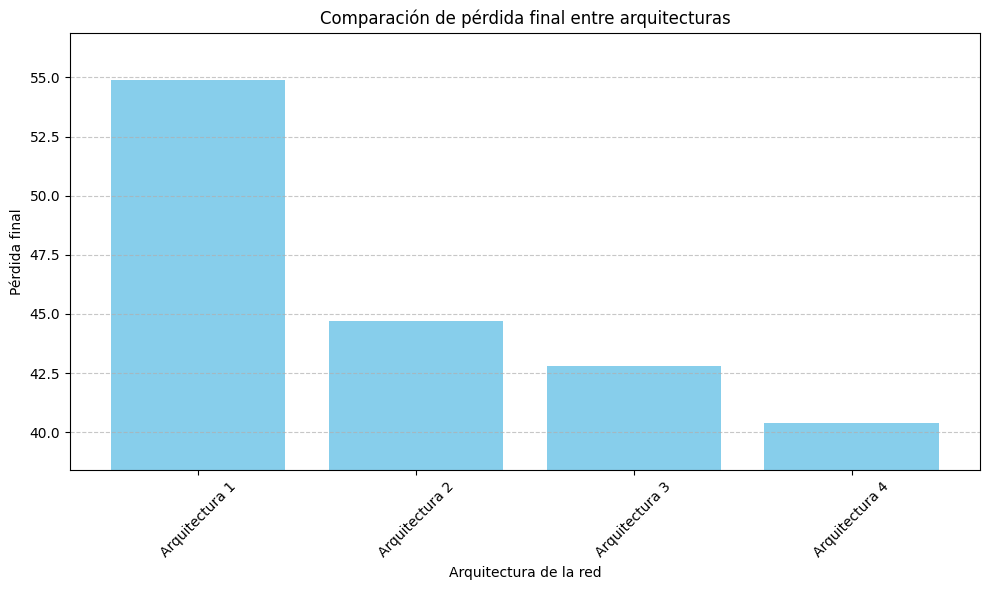

In [29]:
# Pérdida final de cada experimento
losses = [54.8881, 44.6975, 42.8071, 40.3961]

# Nombres de las arquitecturas
architectures = ['Arquitectura 1', 'Arquitectura 2', 'Arquitectura 3', 'Arquitectura 4']

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(architectures, losses, color='skyblue')
plt.xlabel('Arquitectura de la red')
plt.ylabel('Pérdida final')
plt.title('Comparación de pérdida final entre arquitecturas')
plt.xticks(rotation=45)
plt.ylim(min(losses) - 2, max(losses) + 2)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Los valores de pérdida obtenidos al final de cada entrenamiento muestran que el modelo con mejores resultados es el 4. Ahora compararemos estos resultados contra el conjunto de data de validacion, para ver si obtenemos resultados semejantes o si para el caso practico hay que seguir puliendo la arquitectura.

## 3. Elegimos un Optimizer.

Hemos establecido Adam en los entrenamientos anteriores. Vamos a comprobarlo para el conjunto de validación como funciona y después probaremos a usar un optimizador SGD.

### <font color="#004D7F" size=4>Ejercicio 6</font>

Usa la mejor arquitectura y configuración de entrenamiento de los ejercicios anteriores y entrena con la siguiente configuración:

- Usa un `validation_split` de 0.2
- Utiliza todos los datos y no solo 1000.
- Usa 5 epochs en total.

In [53]:
# Completar
# Arquitectura de la red
model4 = tf.keras.models.Sequential([
  # Capa de entrada
  tf.keras.layers.Input(shape=(9,)),

  # Capa oculta
  tf.keras.layers.Dense(1024, activation='relu'),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(16, activation='relu'),

  # Capa de salida
  tf.keras.layers.Dense(1)
])

model4.summary()

#Optimizador: adam,  Learning Rate: 0.001

opt = tf.keras.optimizers.Adam(
    learning_rate=0.001
)

#Compilar el modelo
model4.compile(optimizer=opt,
              loss= actual_loss,
              metrics=['mean_squared_error'])

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_47 (Dense)            (None, 1024)              10240     
                                                                 
 dense_48 (Dense)            (None, 512)               524800    
                                                                 
 dense_49 (Dense)            (None, 256)               131328    
                                                                 
 dense_50 (Dense)            (None, 128)               32896     
                                                                 
 dense_51 (Dense)            (None, 64)                8256      
                                                                 
 dense_52 (Dense)            (None, 32)                2080      
                                                                 
 dense_53 (Dense)            (None, 16)               

In [54]:
hist = model4.fit(x_train, y_train, validation_split=0.2, epochs=5)

Epoch 1/5
409/409 [==============================] - 8s 15ms/step - loss: 50.2798 - mean_squared_error: 22743291904.0000 - val_loss: 44.2723 - val_mean_squared_error: 20764372992.0000
Epoch 2/5
409/409 [==============================] - 5s 13ms/step - loss: 42.9449 - mean_squared_error: 16717924352.0000 - val_loss: 41.5481 - val_mean_squared_error: 13260394496.0000
Epoch 3/5
409/409 [==============================] - 6s 15ms/step - loss: 40.2729 - mean_squared_error: 14119259136.0000 - val_loss: 37.8674 - val_mean_squared_error: 11185739776.0000
Epoch 4/5
409/409 [==============================] - 5s 12ms/step - loss: 36.9633 - mean_squared_error: 11311496192.0000 - val_loss: 37.2597 - val_mean_squared_error: 13654659072.0000
Epoch 5/5
409/409 [==============================] - 6s 15ms/step - loss: 35.1648 - mean_squared_error: 10085283840.0000 - val_loss: 33.5049 - val_mean_squared_error: 9358320640.0000


### <font color="#004D7F" size=4>Ejercicio 7</font>

Realiza el mismo entrenamiento que el ejercicio anterior pero usa un optimizador **SGD** en lugar de un Adam.

In [43]:
# Completar
# Arquitectura de la red
model5 = tf.keras.models.Sequential([
  # Capa de entrada
  tf.keras.layers.Input(shape=(9,)),

  # Capa oculta
  tf.keras.layers.Dense(1024, activation='relu'),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(16, activation='relu'),

  # Capa de salida
  tf.keras.layers.Dense(1)
])

model5.summary()

#Optimizador: sgd,  Learning Rate: 0.001

opt = tf.keras.optimizers.SGD(
    learning_rate=0.001
)

#Compilar el modelo
model5.compile(optimizer=opt,
              loss= actual_loss,
              metrics=['mean_squared_error'])

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 1024)              10240     
                                                                 
 dense_40 (Dense)            (None, 512)               524800    
                                                                 
 dense_41 (Dense)            (None, 256)               131328    
                                                                 
 dense_42 (Dense)            (None, 128)               32896     
                                                                 
 dense_43 (Dense)            (None, 64)                8256      
                                                                 
 dense_44 (Dense)            (None, 32)                2080      
                                                                 
 dense_45 (Dense)            (None, 16)               

In [44]:
histsgd = model5.fit(x_train, y_train, validation_split=0.2, epochs=5)

Epoch 1/5
409/409 [==============================] - 5s 11ms/step - loss: 99.6738 - mean_squared_error: 55626723328.0000 - val_loss: 98.2796 - val_mean_squared_error: 54736392192.0000
Epoch 2/5
409/409 [==============================] - 5s 13ms/step - loss: 63.5993 - mean_squared_error: 32169895936.0000 - val_loss: 56.8222 - val_mean_squared_error: 28913369088.0000
Epoch 3/5
409/409 [==============================] - 4s 10ms/step - loss: 56.7164 - mean_squared_error: 27661125632.0000 - val_loss: 56.3625 - val_mean_squared_error: 27570712576.0000
Epoch 4/5
409/409 [==============================] - 4s 10ms/step - loss: 56.2456 - mean_squared_error: 27453331456.0000 - val_loss: 55.6736 - val_mean_squared_error: 28325146624.0000
Epoch 5/5
409/409 [==============================] - 5s 13ms/step - loss: 54.8034 - mean_squared_error: 26553583616.0000 - val_loss: 59.3311 - val_mean_squared_error: 32454166528.0000


### <font color="#004D7F" size=4>Ejercicio 8</font>

**¿Qué optimizador ha funcionado mejor?**

El optimizador que eligas tendrás que usarlo en los siguientes ejercicios.

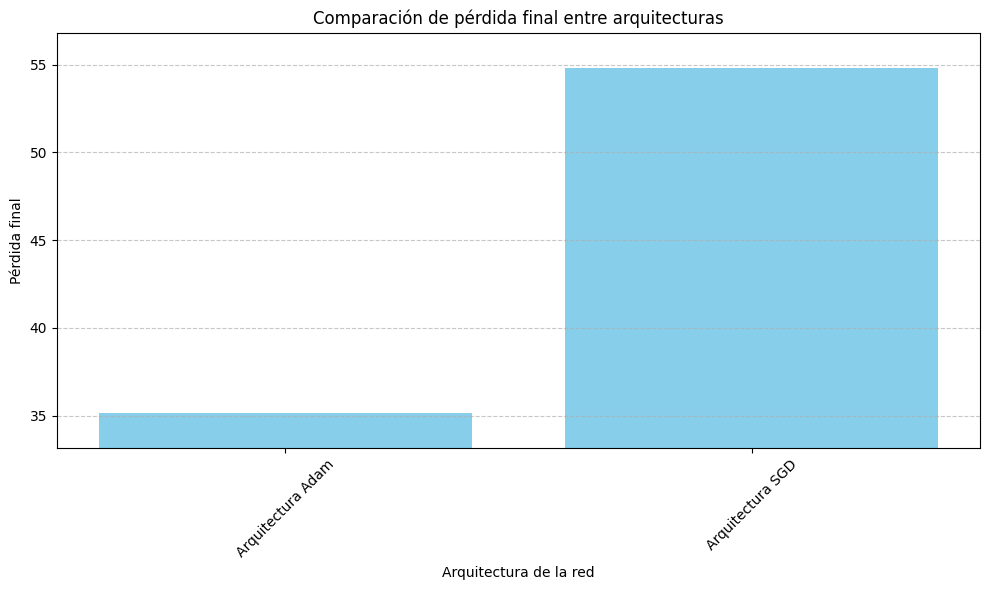

In [55]:
# Pérdida final de cada experimento
losses = [35.1648, 54.8034]

# Nombres de las arquitecturas
architectures = ['Arquitectura Adam', 'Arquitectura SGD']

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(architectures, losses, color='skyblue')
plt.xlabel('Arquitectura de la red')
plt.ylabel('Pérdida final')
plt.title('Comparación de pérdida final entre arquitecturas')
plt.xticks(rotation=45)
plt.ylim(min(losses) - 2, max(losses) + 2)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Los valores de pérdida obtenidos al final de cada entrenamiento muestran que el modelo con mejores resultados es el modelo entrenado con ADAM. Ahora compararemos estos resultados contra el conjunto de data de validacion.

In [56]:
def show_results(hist):
    fig=plt.figure(figsize=(60, 40))

    # error
    fig.add_subplot(10, 10, 1)
    plt.title('Loss')
    plt.plot(hist.history['loss'], label='train')
    plt.plot(hist.history['val_loss'], label='val')
    plt.legend()

    # precision
    fig.add_subplot(10, 10, 2)
    plt.title('mean_squared_error')
    plt.plot(hist.history['mean_squared_error'], label='train')
    plt.plot(hist.history['val_mean_squared_error'], label='val')
    plt.legend()

    plt.legend()
    plt.show()

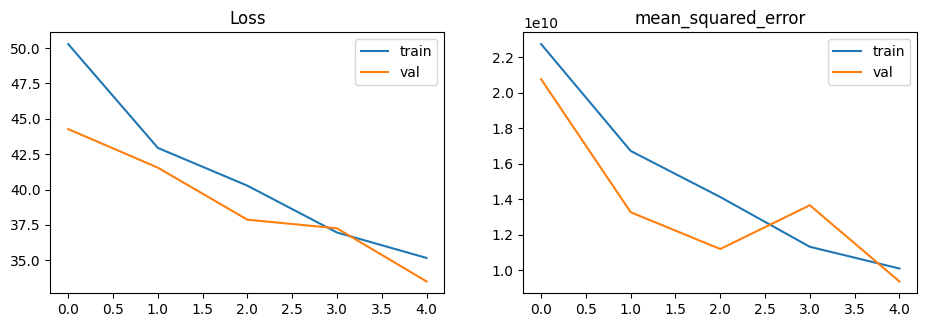

In [57]:
show_results(hist)

La línea azul representa la pérdida (loss) en el conjunto de entrenamiento a lo largo de las épocas (representadas en el eje x). A medida que las épocas avanzan, la pérdida disminuye, lo que indica que el modelo está aprendiendo y mejorando su rendimiento. La línea naranja representa la pérdida en el conjunto de evaluación (validación). Al igual que en el conjunto de entrenamiento, la pérdida disminuye con las épocas.

Como ambas líneas se mantienen cerca y disminuyen juntas, es un buen signo de que el modelo está aprendiendo correctamente.

## 4. Probar diferentes configuraciones con un número pequeño de epochs.

Vamos a realizar diferentes experimentos cambiando el learning rate de nuestro optimizador.

### <font color="#004D7F" size=4>Ejercicio 9</font>

Realiza un entrenamiento con la arquitectura y el optimizador que mejor te ha funcionado y utilizar un **learning rate de 0.1**.

In [58]:
# Completar
# Arquitectura de la red
model4 = tf.keras.models.Sequential([
  # Capa de entrada
  tf.keras.layers.Input(shape=(9,)),

  # Capa oculta
  tf.keras.layers.Dense(1024, activation='relu'),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(16, activation='relu'),

  # Capa de salida
  tf.keras.layers.Dense(1)
])

model4.summary()

#Optimizador: adam,  Learning Rate: 0.001

opt = tf.keras.optimizers.Adam(
    learning_rate=0.1
)

#Compilar el modelo
model4.compile(optimizer=opt,
              loss= actual_loss,
              metrics=['mean_squared_error'])

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_55 (Dense)            (None, 1024)              10240     
                                                                 
 dense_56 (Dense)            (None, 512)               524800    
                                                                 
 dense_57 (Dense)            (None, 256)               131328    
                                                                 
 dense_58 (Dense)            (None, 128)               32896     
                                                                 
 dense_59 (Dense)            (None, 64)                8256      
                                                                 
 dense_60 (Dense)            (None, 32)                2080      
                                                                 
 dense_61 (Dense)            (None, 16)               

In [59]:
hist = model4.fit(x_train, y_train, validation_split=0.2, epochs=5)

Epoch 1/5
409/409 [==============================] - 8s 16ms/step - loss: 363.4554 - mean_squared_error: 102041485574144.0000 - val_loss: 99.9739 - val_mean_squared_error: 56599658496.0000
Epoch 2/5
409/409 [==============================] - 5s 13ms/step - loss: 99.9600 - mean_squared_error: 55629475840.0000 - val_loss: 99.9471 - val_mean_squared_error: 56582725632.0000
Epoch 3/5
409/409 [==============================] - 6s 16ms/step - loss: 99.9328 - mean_squared_error: 55612653568.0000 - val_loss: 99.9203 - val_mean_squared_error: 56565825536.0000
Epoch 4/5
409/409 [==============================] - 5s 12ms/step - loss: 99.9057 - mean_squared_error: 55595917312.0000 - val_loss: 99.8935 - val_mean_squared_error: 56548921344.0000
Epoch 5/5
409/409 [==============================] - 5s 13ms/step - loss: 99.8784 - mean_squared_error: 55579242496.0000 - val_loss: 99.8667 - val_mean_squared_error: 56532004864.0000


### <font color="#004D7F" size=4>Ejercicio 10</font>

Realiza el mismo entrenamiento que el ejercicio anterior pero esta vez usa un **learning rate de 0.0001**.

In [60]:
# Completar
# Arquitectura de la red
model4 = tf.keras.models.Sequential([
  # Capa de entrada
  tf.keras.layers.Input(shape=(9,)),

  # Capa oculta
  tf.keras.layers.Dense(1024, activation='relu'),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(16, activation='relu'),

  # Capa de salida
  tf.keras.layers.Dense(1)
])

model4.summary()

#Optimizador: adam,  Learning Rate: 0.001

opt = tf.keras.optimizers.Adam(
    learning_rate=0.0001
)

#Compilar el modelo
model4.compile(optimizer=opt,
              loss= actual_loss,
              metrics=['mean_squared_error'])

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_63 (Dense)            (None, 1024)              10240     
                                                                 
 dense_64 (Dense)            (None, 512)               524800    
                                                                 
 dense_65 (Dense)            (None, 256)               131328    
                                                                 
 dense_66 (Dense)            (None, 128)               32896     
                                                                 
 dense_67 (Dense)            (None, 64)                8256      
                                                                 
 dense_68 (Dense)            (None, 32)                2080      
                                                                 
 dense_69 (Dense)            (None, 16)              

In [61]:
hist = model4.fit(x_train, y_train, validation_split=0.2, epochs=5)

Epoch 1/5
409/409 [==============================] - 7s 13ms/step - loss: 64.2160 - mean_squared_error: 32911792128.0000 - val_loss: 53.7687 - val_mean_squared_error: 25854849024.0000
Epoch 2/5
409/409 [==============================] - 6s 14ms/step - loss: 51.2578 - mean_squared_error: 24497999872.0000 - val_loss: 46.4335 - val_mean_squared_error: 21470156800.0000
Epoch 3/5
409/409 [==============================] - 6s 14ms/step - loss: 44.3270 - mean_squared_error: 19070062592.0000 - val_loss: 44.3288 - val_mean_squared_error: 20097935360.0000
Epoch 4/5
409/409 [==============================] - 5s 13ms/step - loss: 43.1453 - mean_squared_error: 17426747392.0000 - val_loss: 43.3378 - val_mean_squared_error: 18809954304.0000
Epoch 5/5
409/409 [==============================] - 6s 15ms/step - loss: 42.6618 - mean_squared_error: 16955040768.0000 - val_loss: 42.8802 - val_mean_squared_error: 18034825216.0000


## 5. Ajuste refinado de los parámetros con más epochs. [Opcional]

Por último vamos a realizar un entrenamiento más largo para ver hasta donde llega el rendimiento de nuestro modelo.

### <font color="#004D7F" size=4>Ejercicio 11 [Opcional]</font>

**¿Entre los entrenamientos usando learning rates igual a 0.001, 0.1 y 0.0001 cual ha funcionado mejor?**

Con el experimento que mejor haya funcionado haz un entrenamiento usando 30 epochs y ver que tal funciona el entrenamiento con más epochs.

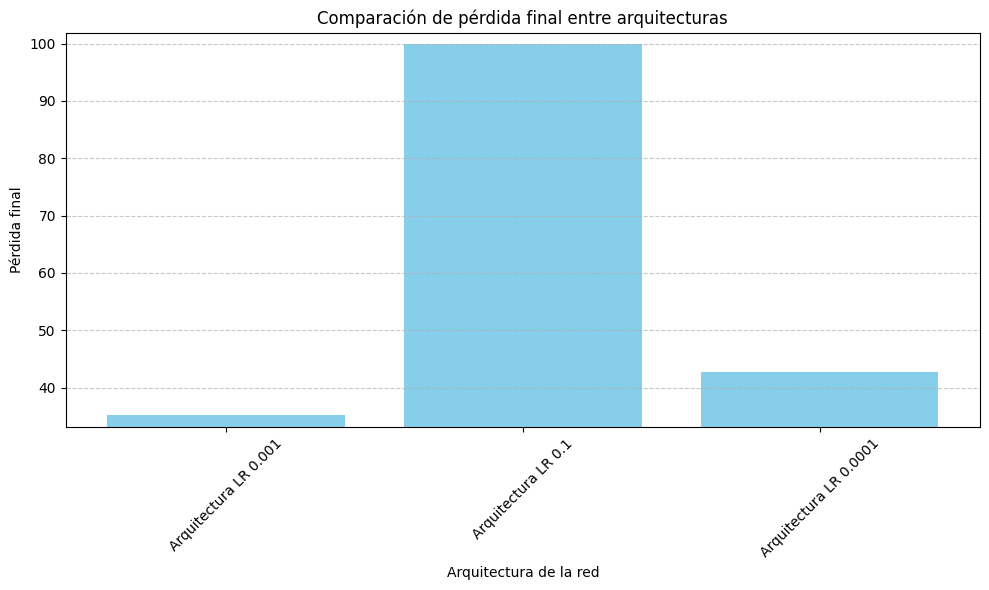

In [62]:
# Pérdida final de cada experimento
losses = [35.1648, 99.8784, 42.6618]

# Nombres de las arquitecturas
architectures = ['Arquitectura LR 0.001', 'Arquitectura LR 0.1', 'Arquitectura LR 0.0001']

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(architectures, losses, color='skyblue')
plt.xlabel('Arquitectura de la red')
plt.ylabel('Pérdida final')
plt.title('Comparación de pérdida final entre arquitecturas')
plt.xticks(rotation=45)
plt.ylim(min(losses) - 2, max(losses) + 2)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

A pesar de haber ajustado los valores del learning rate entre sus extremos, la mejor arquitectura sigue siendo la que solo utiliza 0.001 ya que es un punto medio entre los saltos que debe dar el modelo para alcanzar una mejora significativa al momento de predecir los datos.

La arquitectura de 0.1 no pudo obtener mejor calificacion debido a que en solo 5 epoch los saltos de 1 no llegarian y aunque por el contrario la de 0.0001 dio mejores resultados que esta ultima llego un punto donde se estanca en el numero de perdida.

In [66]:
# Completar
# Arquitectura de la red
model4 = tf.keras.models.Sequential([
  # Capa de entrada
  tf.keras.layers.Input(shape=(9,)),

  # Capa oculta
  tf.keras.layers.Dense(1024, activation='relu'),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(16, activation='relu'),

  # Capa de salida
  tf.keras.layers.Dense(1)
])

model4.summary()

#Optimizador: adam,  Learning Rate: 0.001

opt = tf.keras.optimizers.Adam(
    learning_rate=0.001
)

#Compilar el modelo
model4.compile(optimizer=opt,
              loss= actual_loss,
              metrics=['mean_squared_error'])

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_71 (Dense)            (None, 1024)              10240     
                                                                 
 dense_72 (Dense)            (None, 512)               524800    
                                                                 
 dense_73 (Dense)            (None, 256)               131328    
                                                                 
 dense_74 (Dense)            (None, 128)               32896     
                                                                 
 dense_75 (Dense)            (None, 64)                8256      
                                                                 
 dense_76 (Dense)            (None, 32)                2080      
                                                                 
 dense_77 (Dense)            (None, 16)              

In [67]:
hist = model4.fit(x_train, y_train, validation_split=0.2, epochs=30)

Epoch 1/30
409/409 [==============================] - 8s 14ms/step - loss: 50.8229 - mean_squared_error: 22991306752.0000 - val_loss: 43.6934 - val_mean_squared_error: 19469809664.0000
Epoch 2/30
409/409 [==============================] - 7s 16ms/step - loss: 42.8805 - mean_squared_error: 16556506112.0000 - val_loss: 40.9677 - val_mean_squared_error: 15782969344.0000
Epoch 3/30
409/409 [==============================] - 5s 13ms/step - loss: 40.1679 - mean_squared_error: 14217550848.0000 - val_loss: 37.3446 - val_mean_squared_error: 12243303424.0000
Epoch 4/30
409/409 [==============================] - 7s 16ms/step - loss: 37.2086 - mean_squared_error: 11483318272.0000 - val_loss: 43.4607 - val_mean_squared_error: 11111796736.0000
Epoch 5/30
409/409 [==============================] - 6s 14ms/step - loss: 35.3150 - mean_squared_error: 10265684992.0000 - val_loss: 32.1481 - val_mean_squared_error: 8589692416.0000
Epoch 6/30
409/409 [==============================] - 7s 18ms/step - loss: 3

### <font color="#004D7F" size=4>Ejercicio 12 [Opcional]</font>

Muestra en una gráfica como ha evolucionado el entrenamiento.

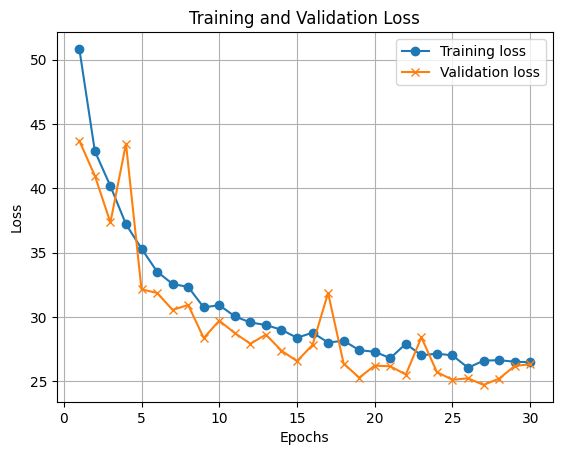

In [68]:
# Obtener la pérdida y las métricas del historial
loss = hist.history['loss']
val_loss = hist.history.get('val_loss')

# Crear una lista con el número de épocas
epochs = range(1, len(loss) + 1)

# Graficar la pérdida en el conjunto de entrenamiento
plt.plot(epochs, loss, label='Training loss', marker='o')
if val_loss is not None:
    # Graficar la pérdida en el conjunto de validación si está disponible
    plt.plot(epochs, val_loss, label='Validation loss', marker='x')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()